# Bike Sharing Assignment_ P V Balaji

## Multiple Linear Regression

The aim of this work is to build a multiple linear regression model for the prediction of demand for shared bikes.

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know


### Attribute Information:


### Dataset characteristics
	
*   **instant:** record index
*   **dteday:** date
*   **season:** season (1:spring, 2:summer, 3:fall, 4:winter)
*   **yr:** year (0: 2018, 1:2019)
*   **mnth:** month ( 1 to 12)
*   **holiday:** weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*   **weekday:** day of the week
*   **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
*   **weathersit:** 
	*   **1:** Clear, Few clouds, Partly cloudy, Partly cloudy
	*   **2:** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	*   **3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	*   **4:** Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   **temp:** temperature in Celsius
*   **atemp:** feeling temperature in Celsius
*   **hum:** humidity
*   **windspeed:** wind speed
*   **casual:** count of casual users
*   **registered:** count of registered users
*   **cnt:** count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [3]:
bike = pd.read_csv('day.csv') 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspect the various aspects of our dataframe

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#Feature level insights:
*   **Categorical columns:** season, mnth, weekday, weathersit
*   **Binary columns:** yr, workingday, holiday
*   **Continuous columns:** temp, atemp, hum, windspeed, cnt, casual, registered
*   **Redundant**: instant (serial number column) and dteday(masked date)

### Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [6]:
# check for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**No null values detected across columns**



In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Preparation and EDA

## Step 2.1: Data Preparation

**Creating a copy of base data to do transformations/cleaning**

In [8]:
bike_dp = bike.copy()

In [9]:
bike_dp = bike_dp.drop(['instant','dteday','casual','registered'],axis=1)
bike_dp.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


## Step 2.2  EDA & Visualising the Data 
Let's now  visualize the data to get some useful unferences

<Axes: >

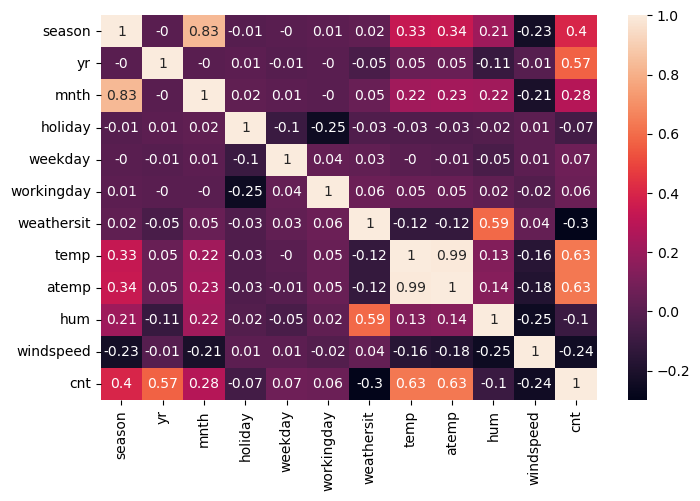

In [10]:
#creating correlation matrix
correlation_matrix = bike_dp.corr().round(2)

#overlaying heatmap on top of correlation matrix

# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(8,5))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)          

### Insights from the above correlation map

**Target variable:** cnt

#Insights:

**Correlations between target and predictor variables:**
*   Variables having a high correlation with target variable: yr, temp, atemp
*   Variables having a moderate correlation with target variable: windspeed 
*   Variables having aweak correlation with target variable: holiday, workingday, hum.


**Multicollinearity issues:**
*   Variable 'atemp' having 0.99 correlation with 'temp'
*   Variable 'hum' having 0.59 correlation with 'weathersit'

**Note**
* Correlation for all the predictor variables is not captured, suggesting for the modification to a right data types for them 

**Insight:** Variables with high multicollinearity makes a linear regression model unstable and should be removed. The above analysis just highlights potential issues with features, we would be further analysis VIFs, correlation to target variable and p-value before stepwise elimination of multicollinear variables.


## Investigating the uniqueness of catogorical variables

In [11]:
print(bike_dp[['season','weekday','weathersit','mnth']].astype(object).describe())

        season  weekday  weathersit  mnth
count      730      730         730   730
unique       4        7           3    12
top          3        6           1     1
freq       188      105         463    62


In [12]:
bike_dp.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Mapping the categorical columns with thier respective description

In [13]:
# mapping the season column with its description
bike_dp.season = bike_dp.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping the month column with its description
bike_dp.mnth = bike_dp.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Mapping the weekday column with its description
bike_dp.weekday = bike_dp.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Mapping the weathersit column with its description
bike_dp.weathersit = bike_dp.weathersit.map({1:'clear',2:'misty',3:'light_snow',4:'heavy_rain'})

In [14]:
bike_dp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


- Now we can see that the categorical variables are rightly labelled

In [15]:
bike_dp.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

- Now we can see that the data types are rightly assigned

# Analysis of correlation between target variable and Year:

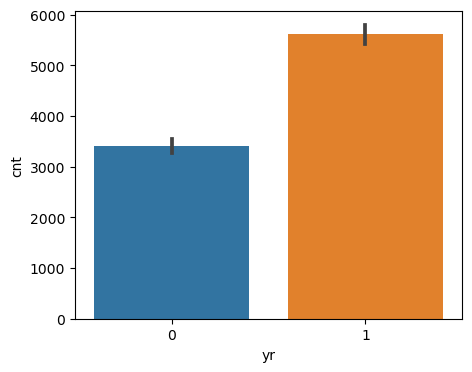

In [16]:
plt.figure(figsize=[5, 4])
sns.barplot(x='yr', y="cnt", data=bike_dp)
plt.show()

**Insight:** More bikes are rented in 2019, while we need more data (for many years) to predict any trend 

# Analysis of correlation between target variable and month:

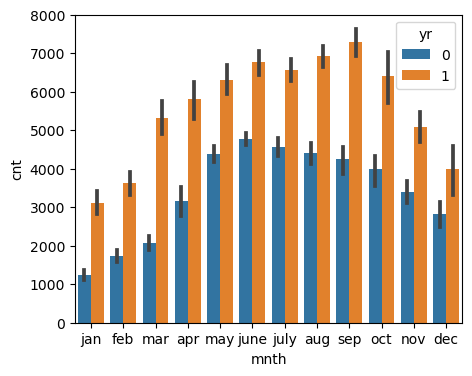

In [17]:
plt.figure(figsize=[5, 4])
sns.barplot(x='mnth', y="cnt", hue="yr", data=bike_dp)
plt.show()

**Insight:** More bikes are rented between May to Sep, presumably the weather could be one of the factor. 

# Analysis of correlation between target variable and Holidays:

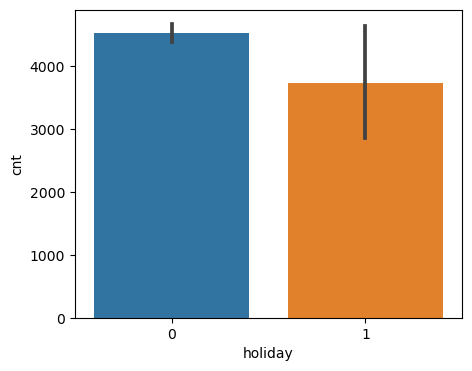

In [18]:
plt.figure(figsize=[5, 4])
sns.barplot(x='holiday', y="cnt", data=bike_dp)
plt.show()

**Insight:** More bikes are rented on working days than holidays

# Analysis of correlation between target variable and Weekdays:

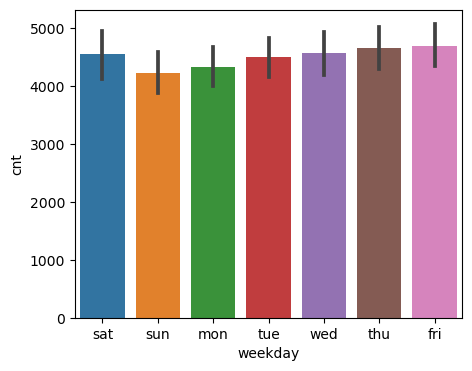

In [19]:
plt.figure(figsize=[5, 4])
sns.barplot(x='weekday', y="cnt", data=bike_dp)
plt.show()

**Insight:** There is no strong trend between target variable and weekdays, while it is least on sundays 

# Analysis of correlation between target variable and weathersit:

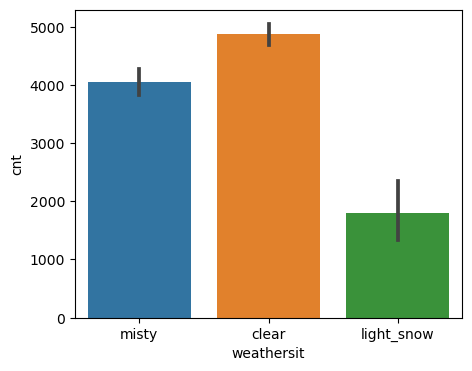

In [20]:
plt.figure(figsize=[5, 4])
sns.barplot(x='weathersit', y="cnt", data=bike_dp)
plt.show()

**Insight:** There is a good trend between the weather situtaion and target variable
-  Highest no of bikes were rented when the weather was clear 

# Analysis of correlation between target variable and continious numerical variables:

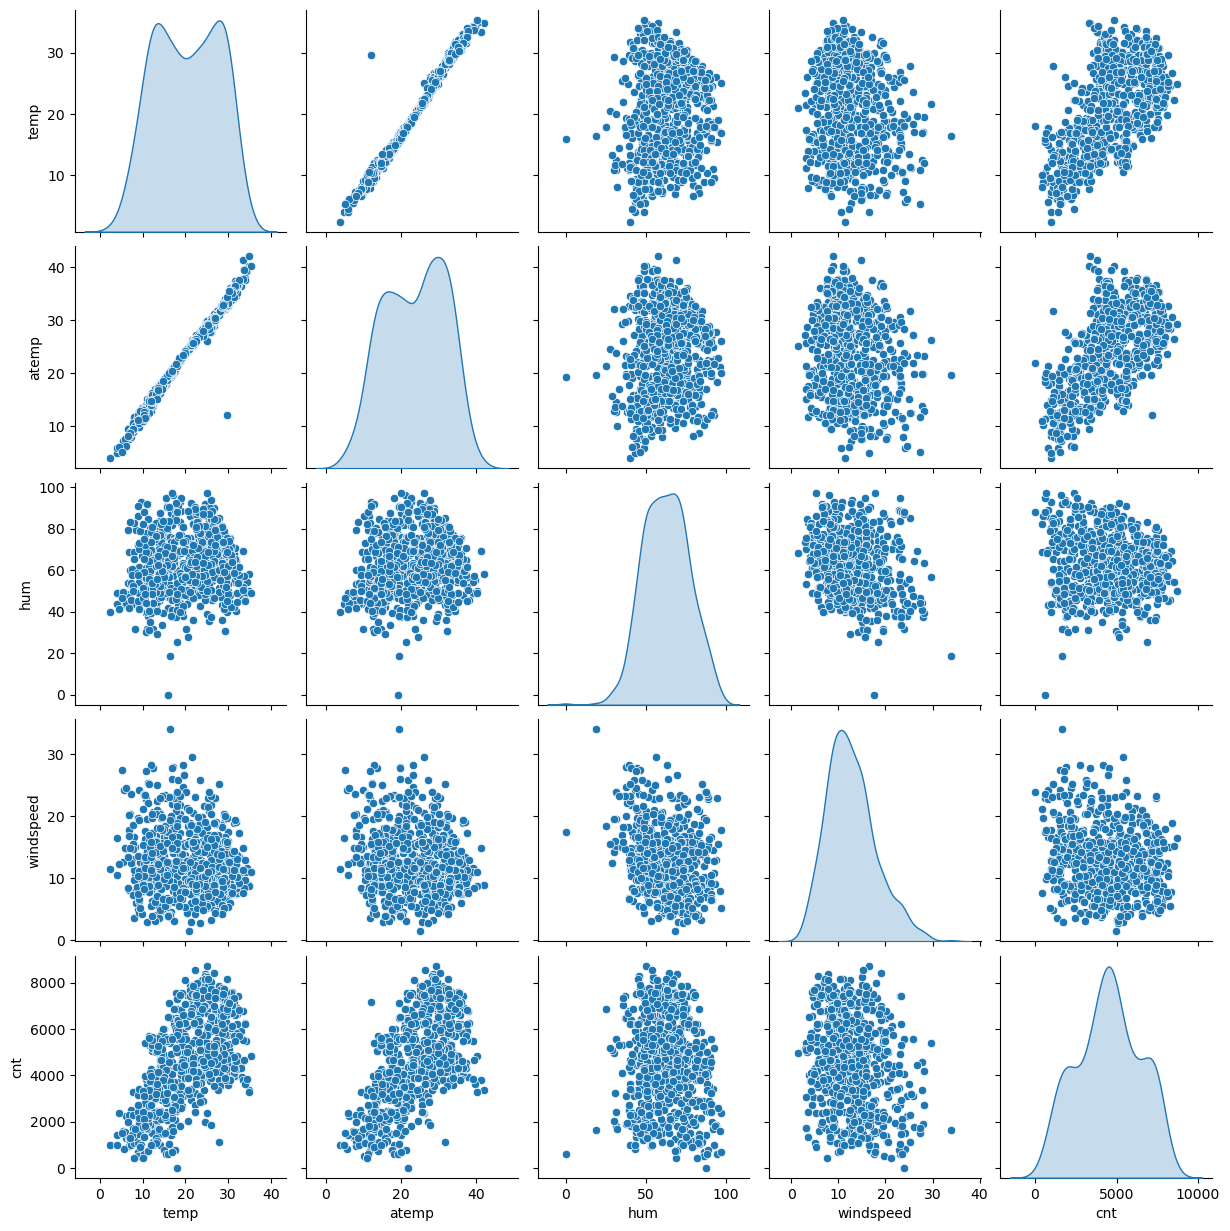

In [21]:
bike_num=bike_dp[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

**Insight:** 
- There is clear linear positive correlation between the **target variable** and predictor variables **temp** & **atemp** 
-  
- **Multicollinearity issues:** Variables 'atemp' & 'temp' are having evident linear correlation 

## Step 2.3: Data preparation for model_Creating Dummy Variables

In [22]:
bike_dpn = pd.get_dummies(bike_dp,drop_first=True)
bike_dpn.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
bike_dpn.dtypes

yr                         int64
holiday                    int64
workingday                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
cnt                        int64
season_spring              uint8
season_summer              uint8
season_winter              uint8
mnth_aug                   uint8
mnth_dec                   uint8
mnth_feb                   uint8
mnth_jan                   uint8
mnth_july                  uint8
mnth_june                  uint8
mnth_mar                   uint8
mnth_may                   uint8
mnth_nov                   uint8
mnth_oct                   uint8
mnth_sep                   uint8
weekday_mon                uint8
weekday_sat                uint8
weekday_sun                uint8
weekday_thu                uint8
weekday_tue                uint8
weekday_wed                uint8
weathersit_light_snow      uint8
weathersit_misty           uint8
dtype: obj

<Axes: >

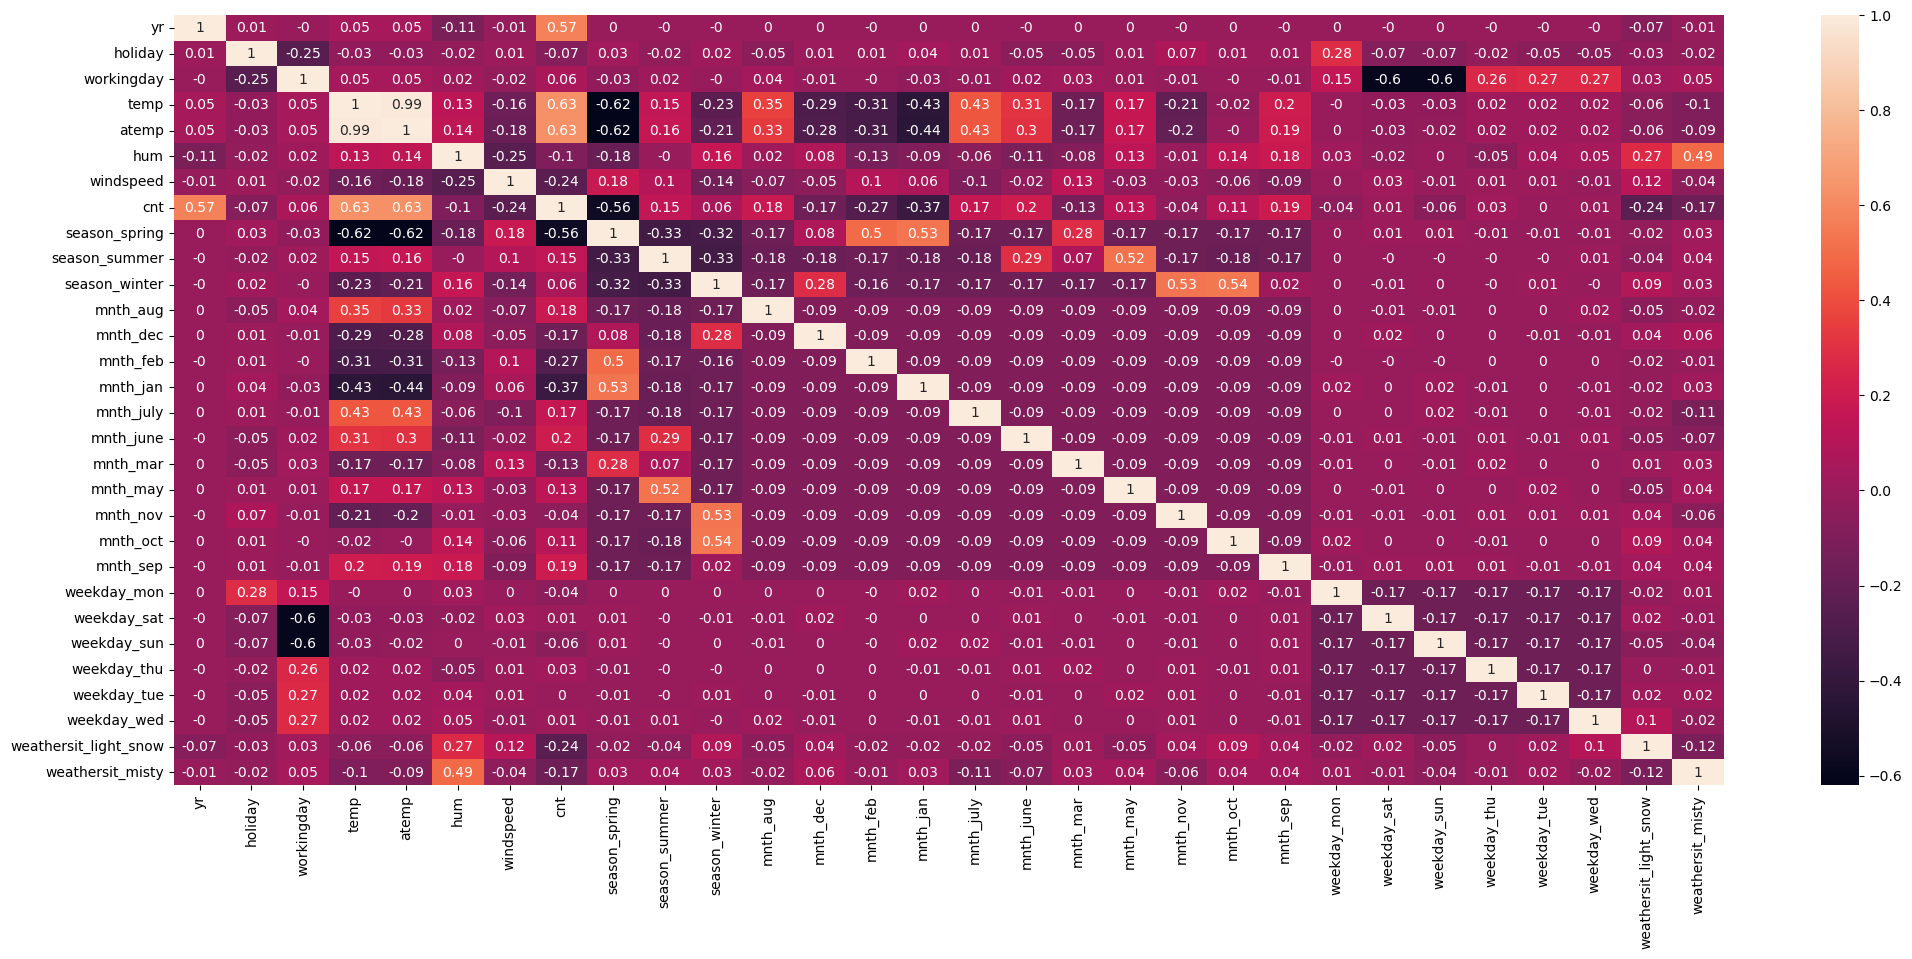

In [24]:
correlation_matrix = bike_dpn.corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(25,10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

### Insights from the above correlation map with all the variables including dummy variables



**Correlations between target and predictor variables:**
*   Variables having a high correlation with target variable: yr, temp, atemp
*   Variables having a moderate correlation with target variable: windspeed & season_spring 


**Multicollinearity issues:**
*   Variable 'atemp' having 0.99 correlation with 'temp'
*   While there are other high correlation between variables

**Conclusions** 
- The current data is clean and fine for model building 
- Let us build the model and for further investigations

# Step 3: Model building and evaluation

## Step 3.1: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_dpn, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the numerical continuous variables using MinMaxScaler Method for ***train set***

In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,atemp,hum,windspeed
653,0.509887,0.501133,0.575354,0.300794
576,0.815169,0.766351,0.725633,0.264686
426,0.442393,0.438975,0.640189,0.255342
728,0.245101,0.200348,0.498067,0.663106
482,0.395666,0.391735,0.504508,0.188475


In [27]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling the numerical continuous variables using MinMaxScaler Method for ***test set***

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test[num_vars].head()

,temp,atemp,hum,windspeed
184,0.837241,0.778767,0.534223,0.149393
535,0.911423,0.855132,0.470417,0.231142
299,0.496221,0.492359,0.777843,0.443398
221,0.890387,0.805661,0.236659,0.449707
152,0.821739,0.749249,0.070765,0.682387


In [30]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [33]:
y_train

653    7534
576    7216
426    4066
728    1796
482    4220
       ... 
526    6664
578    7261
53     1917
350    2739
79     2077
Name: cnt, Length: 510, dtype: int64

# Step 3.2:  Building a Linear Model using 'STATS MODEL'

## Model-1
*  Target variable is count of bikes, i.e., "cnt"
*  In this model all the variables are considered as predictor variable except the target variable
*  **Feature Selection**: Manual feature selection

In [34]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [35]:
lr.params

const                    2149.196076
yr                       2018.348421
holiday                    97.307347
workingday                847.190517
temp                     3488.288457
atemp                     440.054334
hum                     -1319.550957
windspeed               -1602.699325
season_spring            -422.258575
season_summer             332.170734
season_winter             916.027215
mnth_aug                  139.732668
mnth_dec                 -396.109960
mnth_feb                 -279.674040
mnth_jan                 -543.819235
mnth_july                -341.392838
mnth_june                 -14.807162
mnth_mar                   11.194999
mnth_may                  214.614815
mnth_nov                 -363.175189
mnth_oct                   66.884232
mnth_sep                  711.055505
weekday_mon              -186.894940
weekday_sat               839.347859
weekday_sun               365.350353
weekday_thu               -84.745317
weekday_tue              -167.827156
w

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.42e-181
Time:                        19:15:04   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2149.19

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.60
3,temp,67.12
4,atemp,56.09
22,weekday_sat,19.72
23,weekday_sun,18.35
7,season_spring,10.80
9,season_winter,9.52
8,season_summer,8.31
18,mnth_nov,6.80
19,mnth_oct,6.59


## Inferences from Model-1
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.845** 
*   and with **Prob (F-statistic):  8.42e-181**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **mnth_mar** as a predictor variable, whose **P>|t|** is **0.958**

## Building Model-2
* dropping **mnth_mar** as a predictor variable

In [38]:
X_train = X_train.drop(['mnth_mar'], axis=1)

In [39]:
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.19e-182
Time:                        19:15:07   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2154.80

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.93
3,temp,67.07
4,atemp,56.05
21,weekday_sat,17.22
22,weekday_sun,16.19
7,season_spring,9.70
9,season_winter,9.19
8,season_summer,8.01
10,mnth_aug,5.81
14,mnth_july,5.18


## Inferences from Model-2
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.845** 
*   and with **Prob (F-statistic):  8.19e-182**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **mnth_june** as a predictor variable, whose **P>|t|** is **0.929**

## Building Model-3
* dropping **mnth_june** as a predictor variable

In [41]:
X_train = X_train.drop(['mnth_june'], axis=1)

In [42]:
X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.82e-183
Time:                        19:15:10   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     483   BIC:                             8364.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2152.67

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.38
3,temp,61.12
4,atemp,55.03
20,weekday_sat,17.04
21,weekday_sun,16.03
9,season_winter,8.90
7,season_spring,8.77
8,season_summer,7.51
16,mnth_nov,4.77
17,mnth_oct,4.52


## Inferences from Model-3
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.845** 
*   and with **Prob (F-statistic):  7.82e-183**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **mnth_oct** as a predictor variable, whose **P>|t|** is **0.803**

## Building Model-4
* dropping **mnth_oct** as a predictor variable

In [44]:
X_train = X_train.drop(['mnth_oct'], axis=1)

In [45]:
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.52e-184
Time:                        19:15:13   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     484   BIC:                             8358.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2166.23

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.12
3,temp,60.90
4,atemp,54.95
19,weekday_sat,16.53
20,weekday_sun,15.53
7,season_spring,8.60
8,season_summer,6.63
9,season_winter,6.36
1,holiday,3.97
10,mnth_aug,3.19


## Inferences from Model-4
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  7.82e-184**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **atemp** as a predictor variable, whose **P>|t|** is **0.696 &  very high VIF, 54.95**

## Building Model-5
* dropping **atemp** as a predictor variable

In [47]:
X_train = X_train.drop(['atemp'], axis=1)

In [48]:
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.40e-185
Time:                        19:15:15   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     485   BIC:                             8352.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2163.17

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.05
18,weekday_sat,16.53
19,weekday_sun,15.53
6,season_spring,8.55
7,season_summer,6.58
8,season_winter,6.29
3,temp,4.93
1,holiday,3.96
9,mnth_aug,3.17
13,mnth_july,2.81


## Inferences from Model-5
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  7.40e-185**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **weekday_wed** as a predictor variable, whose **P>|t|** is **0.713**

## Building Model-6
* dropping **weekday_wed** as a predictor variable

In [50]:
X_train = X_train.drop(['weekday_wed'], axis=1)

In [51]:
X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.06e-186
Time:                        19:15:17   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2157.40

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,70.12
18,weekday_sat,16.51
19,weekday_sun,15.50
6,season_spring,8.55
7,season_summer,6.57
8,season_winter,6.29
3,temp,4.92
1,holiday,3.91
9,mnth_aug,3.17
13,mnth_july,2.81


## Inferences from Model-6
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  7.06e-186**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **holiday** as a predictor variable, whose **P>|t|** is **0.663**

## Building Model-7
* dropping **holiday** as a predictor variable

In [53]:
X_train = X_train.drop(['holiday'], axis=1)

In [54]:
X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.06e-186
Time:                        19:15:19   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2245.37

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.42
2,temp,24.26
1,workingday,20.83
5,season_spring,8.39
7,season_winter,6.72
6,season_summer,6.66
17,weekday_sat,5.91
18,weekday_sun,5.58
4,windspeed,5.13
8,mnth_aug,3.26


## Inferences from Model-7
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  7.06e-186**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **weekday_thu** as a predictor variable, whose **P>|t|** is **0.636**

## Building Model-8
* dropping **weekday_thu** as a predictor variable

In [56]:
X_train = X_train.drop(['weekday_thu'], axis=1)

In [57]:
X_train_lm = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.87e-187
Time:                        19:15:21   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     487   BIC:                             8340.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2221.64

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,36.38
2,temp,24.15
1,workingday,20.80
5,season_spring,8.36
7,season_winter,6.71
6,season_summer,6.65
17,weekday_sat,5.81
18,weekday_sun,5.49
4,windspeed,5.12
8,mnth_aug,3.26


## Inferences from Model-8
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.847** 
*   and with **Prob (F-statistic):  6.87e-187**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **mnth_aug** as a predictor variable, whose **P>|t|** is **0.527**

## Building Model-9
* dropping **mnth_aug** as a predictor variable

In [59]:
X_train = X_train.drop(['mnth_aug'], axis=1)

In [60]:
X_train_lm = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.12e-188
Time:                        19:15:22   Log-Likelihood:                -4098.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     488   BIC:                             8334.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2291.34

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.53
2,temp,22.61
1,workingday,19.86
5,season_spring,6.09
16,weekday_sat,5.52
17,weekday_sun,5.30
4,windspeed,5.09
7,season_winter,4.45
6,season_summer,3.75
10,mnth_jan,2.43


## Inferences from Model-9
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.847** 
*   and with **Prob (F-statistic):  7.12e-188**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **weekday_tue** as a predictor variable, whose **P>|t|** is **0.267**

## Building Model-10
* dropping **weekday_tue** as a predictor variable

In [62]:
X_train = X_train.drop(['weekday_tue'], axis=1)

In [63]:
X_train_lm = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.09e-188
Time:                        19:15:24   Log-Likelihood:                -4098.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     489   BIC:                             8329.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2277.18

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.43
2,temp,22.61
1,workingday,19.79
5,season_spring,6.09
16,weekday_sat,5.49
17,weekday_sun,5.26
4,windspeed,5.09
7,season_winter,4.44
6,season_summer,3.75
10,mnth_jan,2.43


## Inferences from Model-10
*   This model is fine with **R-squared: 0.853 & Adj.R-squared: 0.847** 
*   and with **Prob (F-statistic):   1.09e-188**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **weekday_mon** as a predictor variable, whose **P>|t|** is **0.275**

## Building Model-11
* dropping **weekday_mon** as a predictor variable

In [65]:
X_train = X_train.drop(['weekday_mon'], axis=1)

In [66]:
X_train_lm = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.59e-189
Time:                        19:15:25   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2189.61

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.79
2,temp,22.48
1,workingday,19.10
5,season_spring,6.06
15,weekday_sat,5.11
4,windspeed,5.06
16,weekday_sun,4.89
7,season_winter,4.40
6,season_summer,3.71
10,mnth_jan,2.42


## Inferences from Model-11
*   This model is fine with **R-squared: 0.852 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  1.59e-189**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **mnth_may** as a predictor variable, whose **P>|t|** is **0.148**

## Building Model-12
* dropping **mnth_may** as a predictor variable

In [68]:
X_train = X_train.drop(['mnth_may'], axis=1)

In [69]:
X_train_lm = sm.add_constant(X_train)
lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.55e-190
Time:                        19:15:27   Log-Likelihood:                -4100.6
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     491   BIC:                             8320.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2085.18

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.69
2,temp,22.29
1,workingday,18.92
5,season_spring,6.05
14,weekday_sat,5.04
4,windspeed,4.99
15,weekday_sun,4.85
7,season_winter,4.40
6,season_summer,3.09
10,mnth_jan,2.42


## Inferences from Model-12
*   This model is fine with **R-squared: 0.852 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  3.55e-190**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **mnth_feb** as a predictor variable, whose **P>|t|** is **0.112**

## Building Model-13
* dropping **mnth_feb** as a predictor variable

In [71]:
X_train = X_train.drop(['mnth_feb'], axis=1)

In [72]:
X_train_lm = sm.add_constant(X_train)
lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.55e-191
Time:                        19:15:28   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     492   BIC:                             8316.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1968.11

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.24
2,temp,21.56
1,workingday,18.83
5,season_spring,5.06
13,weekday_sat,5.03
4,windspeed,4.98
14,weekday_sun,4.83
7,season_winter,4.40
6,season_summer,3.08
16,weathersit_misty,2.34


## Inferences from Model-13
*   This model is fine with **R-squared: 0.85 & Adj.R-squared: 0.846** 
*   and with **Prob (F-statistic):  9.55e-191**
*   still few varibles have **P>|t| >0.05 &  VIF >5**
*   so let us refine the model by dropping **weekday_sun** as a predictor variable, whose **P>|t|** is **0.054**

## Building Model-14
* dropping **weekday_sun** as a predictor variable

In [74]:
X_train = X_train.drop(['weekday_sun'], axis=1)

In [75]:
X_train_lm = sm.add_constant(X_train)
lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.53e-191
Time:                        19:15:29   Log-Likelihood:                -4103.9
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     493   BIC:                             8314.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2363.64

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.86
15,weathersit_misty,2.32
0,yr,2.09
13,weekday_sat,1.86


## Inferences from Model-14
*   This model is fine with **R-squared: 0.85 & Adj.R-squared: 0.845** 
*   and with **Prob (F-statistic):  4.53e-191**
*   now there is no varibles have **P>|t| >0.05  but still few have VIF >5**
*   so let us refine the model by dropping **workingday** as a predictor variable, which was having a very high correlation values in the earlier models

## Building Model-15
* dropping **workingday** as a predictor variable

In [77]:
X_train = X_train.drop(['workingday'], axis=1)

In [78]:
X_train_lm = sm.add_constant(X_train)
lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.04e-187
Time:                        19:15:29   Log-Likelihood:                -4115.7
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     494   BIC:                             8331.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2774.55

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.95
1,temp,17.85
3,windspeed,4.74
4,season_spring,4.37
6,season_winter,4.07
5,season_summer,2.81
14,weathersit_misty,2.32
0,yr,2.09
10,mnth_nov,1.81
8,mnth_jan,1.75


## Inferences from Model-15
*   This model is fine after dropping **workingday** as a predictor variable with  **R-squared: 0.843 & Adj.R-squared: 0.838** 
*   and with **Prob (F-statistic):  3.04e-187**
*   now there is one varibles in border-line having  **P>|t| >0.05  but still few have VIF >5**
*   so let us refine the model by dropping **hum** as a predictor variable, which is having a **VIF: 30.95**

## Building Model-16
* dropping **hum** as a predictor variable

In [80]:
X_train = X_train.drop(['hum'], axis=1)

In [81]:
X_train_lm = sm.add_constant(X_train)
lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.80e-185
Time:                        19:15:30   Log-Likelihood:                -4124.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     495   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2143.55

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,4.69
5,season_winter,2.94
3,season_spring,2.88
4,season_summer,2.23
0,yr,2.07
9,mnth_nov,1.77
7,mnth_jan,1.66
8,mnth_july,1.59
13,weathersit_misty,1.56


## Inferences from Model-16
*   This model is alomst fine after dropping **hum** as a predictor variable with  **R-squared: 0.837 & Adj.R-squared: 0.833** 
*   and with **Prob (F-statistic):  8.80e-185**
*   now there are no varible having  **P>|t| >0.05  but still  VIF  for temp is at border-line, i.e., 5.19**
*   so let us refine the model by dropping **weekday_sat** as a predictor variable, whose  **P>|t| is 0.040**

## Building Model-17
* dropping **weekday_sat** as a predictor variable

In [83]:
X_train = X_train.drop(['weekday_sat'], axis=1)

In [84]:
X_train_lm = sm.add_constant(X_train)
lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.10e-185
Time:                        19:15:31   Log-Likelihood:                -4126.5
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2174.72

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
5,season_winter,2.94
3,season_spring,2.88
4,season_summer,2.23
0,yr,2.07
9,mnth_nov,1.77
7,mnth_jan,1.66
8,mnth_july,1.59
12,weathersit_misty,1.56


## Inferences from Model-17
*   This model is alomst fine with **R-squared: 0.836 & Adj.R-squared: 0.832** 
*   and with **Prob (F-statistic):  5.10e-185**
*   now there are no varible having  **P>|t| >0.05  but still  VIF  for temp is at borderine, i.e., 5.17**
*   so let us refine the model by dropping **season_summer** as a predictor variable, whose  **P>|t| is 0.038**

## Building Model-18
* dropping **season_summer** as a predictor variable

In [86]:
X_train = X_train.drop(['season_summer'], axis=1)

In [87]:
X_train_lm = sm.add_constant(X_train)
lr_18 = sm.OLS(y_train, X_train_lm).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.97e-185
Time:                        19:15:31   Log-Likelihood:                -4128.7
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2538.84

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.66
2,windspeed,4.05
4,season_winter,2.54
3,season_spring,2.35
0,yr,2.06
8,mnth_nov,1.77
6,mnth_jan,1.65
11,weathersit_misty,1.53
5,mnth_dec,1.46
7,mnth_july,1.36


## Inferences from Model-18
*   This model is fine with **R-squared: 0.834 & Adj.R-squared: 0.830** 
*   and with **Prob (F-statistic):  2.97e-185**
*   now there is no varible having **P>|t| > 0.05**  
*   now there is no varible having **VIF  > 5**
*   **So this model, Model-18 is good as it fulfills all the necessary criteria**

# Step 4: Evalauation of the model

## Step 4.1: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_pred = lr_18.predict(X_train_lm)

Text(0.5, 0, 'Errors')

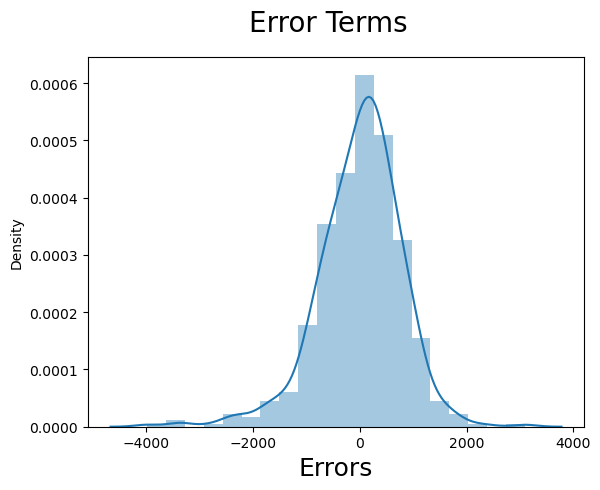

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence one of our assumption for Linear Regression is valid.

## Step 4.2:Validating the other assumptions of Linear Regression

### Test for the linear relationship between X and Y

Text(0, 0.5, 'y_pred')

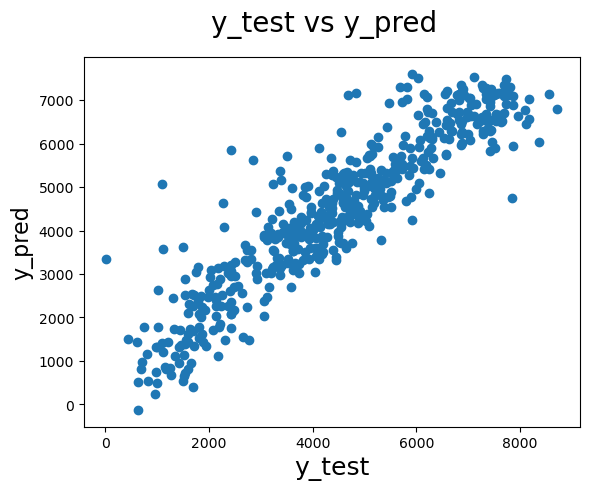

In [91]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

**insight:** from the above plot it is evident that there is a linear relationship between X and Y

### Test for Homoscedasticity

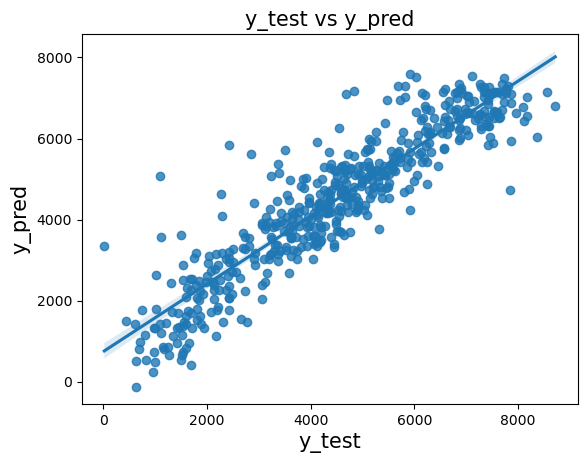

In [92]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('y_test vs y_pred', fontdict={'fontsize': 15})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_pred', fontdict={'fontsize': 15})
plt.show()

**insight:** from the above plot it is evident that variance is constant

### Test for the independency of Error terms

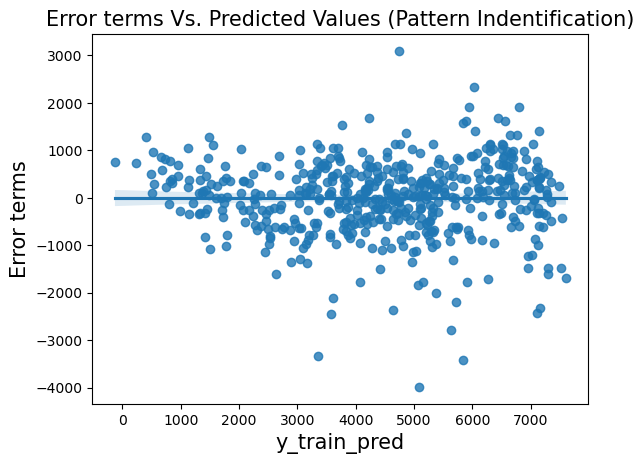

In [93]:
sns.regplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.title('Error terms Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 15})
plt.xlabel('y_train_pred', fontdict={'fontsize': 15})
plt.ylabel('Error terms', fontdict={'fontsize': 15})
plt.show()

**insight:** from the above plot it is evident that Error terms are independent of each other

**Hence all the assumptions for Linear Regression is valid for this model**

## Step 4.3: Evaluating the model with test data

In [94]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [95]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
400    2947
702    6606
127    4333
640    7572
72     2046
Name: cnt, Length: 219, dtype: int64

In [98]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.224955,0.227731,0.603829,0.388364,1,0,0,...,0,0,0,0,1,0,0,0,0,1
702,1,0,1,0.503971,0.508864,0.667633,0.383644,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.573725,0.577423,0.525522,0.132095,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745342,0.687659,0.751160,0.111637,0,0,1,...,1,0,0,0,0,0,0,1,0,1


### Creating X_test_m18 dataframe by dropping insignificant  variables from X_test

In [99]:
# Creating X_test_m18 dataframe by dropping variables from X_test_m4

X_test_m18 = X_test.drop(['mnth_mar','mnth_june','mnth_oct','atemp', 'weekday_wed','holiday','weekday_thu','mnth_aug','weekday_tue', 'weekday_mon', 'mnth_may', 'mnth_feb', 'weekday_sun', 'workingday','hum','weekday_sat','season_summer'], axis = 1)

In [100]:
X_test_m18.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,mnth_sep,weathersit_light_snow,weathersit_misty
184,0,0.837241,0.149393,0,0,0,0,1,0,0,0,1
535,1,0.911423,0.231142,0,0,0,0,0,0,0,0,0
299,0,0.496221,0.443398,0,1,0,0,0,0,0,0,1
221,0,0.890387,0.449707,0,0,0,0,0,0,0,0,0
152,0,0.821739,0.682387,0,0,0,0,0,0,0,0,0


In [101]:
X_test_m18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   temp                   219 non-null    float64
 2   windspeed              219 non-null    float64
 3   season_spring          219 non-null    uint8  
 4   season_winter          219 non-null    uint8  
 5   mnth_dec               219 non-null    uint8  
 6   mnth_jan               219 non-null    uint8  
 7   mnth_july              219 non-null    uint8  
 8   mnth_nov               219 non-null    uint8  
 9   mnth_sep               219 non-null    uint8  
 10  weathersit_light_snow  219 non-null    uint8  
 11  weathersit_misty       219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(9)
memory usage: 8.8 KB


In [102]:
# Adding constant variable to test dataframe
X_test_m18_lm = sm.add_constant(X_test_m18)

#### preidicting y_test from X_test dataset using the model-18

In [103]:
y_test_pred = lr_18.predict(X_test_m18_lm)

**Let's now plot the graph for actual versus predicted values**

Text(0, 0.5, 'y_pred')

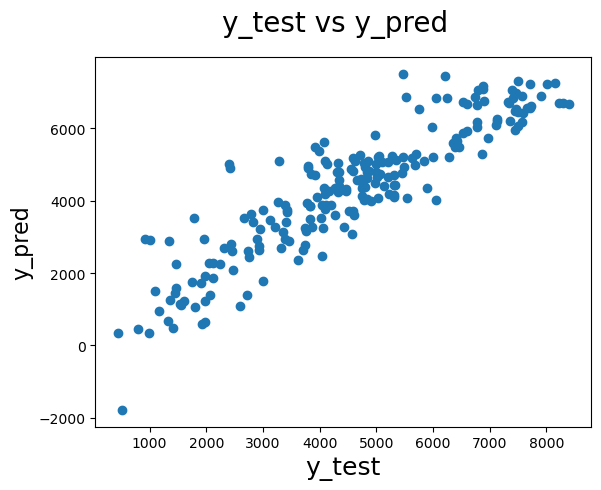

In [104]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Insights
- From the above scatter plot, the predicted target variable is in good correlation with the target variable of the test dataset, so the model is fine


## Calculating R2 for test dataset

In [105]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
round(r2,3)

0.799

- Calculating adj-R2 for test dataset

In [106]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test_m18.shape[0]-1)/(X_test_m18.shape[0]-X_test_m18.shape[1]-1),3)
print(adjusted_r2)

0.787


## Validation of the model 
**Our final model is the OLS model via manual feature selection with:**
    

    - R2 for the model/train dataset     : 0.834
    - adj-R2 for the model/train dataset : 0.830
    - R2 for the test dataset            : 0.799
    - adj-R2 for the test dataset        : 0.787

**Insights**: 
- The R-square and the adjusted-R-square for both the test and training datasets are comparably close, so the model is fine  

# Buisness inferences

### _`Conclusion`_

**Significant variables to predict the demand for shared bikes are:**
- year (2019) 
- temp                     
- windspeed               
- seasons (spring & winter)            
- month (sep, nov, dec, jan, & july) 
- weather (light_snow & misty) 

### Inferences

**Impact of weather on bike demand:**
*   Riding weather conditions have strongest impact on bike demand.
*   Bike demand increases with increasing temperature, signifying clear sunny weather.
*   Bike renting decreases with windspeed 
*   During snowfall bike demand reduces, could be due to the  challenge of riding on a snow-filled road 
*   Mist reduces bike demand as well (not as much as snow), probably due to reduced visibility.

**Impact of seasons on bike demand:**
*   The bike demand in the spring is lesser  
*   During winter, again the demand for bike increases

**Impact of time/year on bike demand:**
*   Bike demand is increasing year over a year strongly. **Caution!**, only two years data is not enough to predict any trend

### Recommendations

**On the impact of weather on bike demand:**
- During the higher windspeed try to provide the right type of cycle which can sustain under those conditions 
- During snow season, replace the summer wheels/thin one with a snow sustainable wheels/ thicker one
- During misty days provide bikes with good quality fog-lamps 

**On the impact of seasons on bike demand:**
- Spring season is the right time for annual maintenance of the vehicles, are there will be lesser demand
- Discounted rates may increase the demand, which indeed needs to be studied  

**On the impact of time/year on bike demand:**
- If the trend continuous the demand for bike sharing will increase, so the enough supply of bikes in good quality may increase the revenue  